## Preprocessing

In [3]:
import numpy as np
import pandas as pd

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

import pprint
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle

from sklearn.metrics import roc_curve, roc_auc_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# load data

nRowsRead = 100
df = pd.read_csv("/content/drive/MyDrive/Fake News/train.csv", delimiter=',', nrows = nRowsRead)
#df.reset_index(inplace=True, drop=True)
df.head()
#len(df)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
df = df.drop(["id", "author"], axis=1)
df.head()

,title,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
df.isnull().sum()

,0
title,1
text,0
label,0


In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()
#df.head()

,0
title,0
text,0
label,0


In [10]:
df['content'] = df['title'] + ' ' + df['text']

df
#len(df)

,title,text,label,content
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Why the Trut...
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...
...,...,...,...,...
95,White House Confirms More Gitmo Transfers Befo...,President Barack Obama will likely release mor...,0,White House Confirms More Gitmo Transfers Befo...
96,The Geometry of Energy and Meditation of Buddha,License DMCA \nA mandala is a visual symbol of...,1,The Geometry of Energy and Meditation of Buddh...
97,Poll: Most Voters Have Not Heard of Democratic...,There is a minefield of potential 2020 electio...,0,Poll: Most Voters Have Not Heard of Democratic...
98,Migrants Confront Judgment Day Over Old Deport...,There are a little more than two weeks between...,0,Migrants Confront Judgment Day Over Old Deport...


In [11]:
#df['content'] = df['title'] + ' ' + df['text']
del df['title']
del df['text']

df
#len(df)

,label,content
0,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,1,Why the Truth Might Get You Fired Why the Trut...
3,1,15 Civilians Killed In Single US Airstrike Hav...
4,1,Iranian woman jailed for fictional unpublished...
...,...,...
95,0,White House Confirms More Gitmo Transfers Befo...
96,1,The Geometry of Energy and Meditation of Buddh...
97,0,Poll: Most Voters Have Not Heard of Democratic...
98,0,Migrants Confront Judgment Day Over Old Deport...


Fake :  55
True :  44


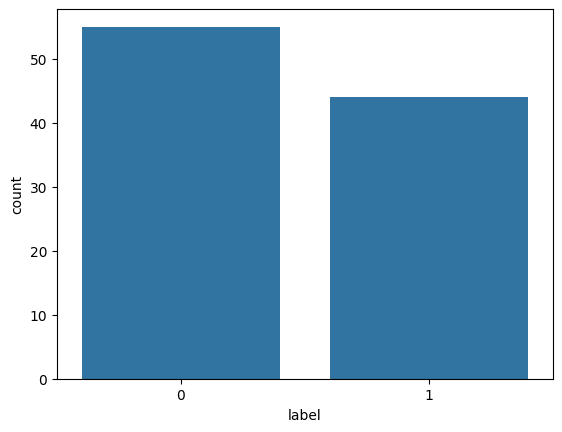

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

y = df.label
F, T = y.value_counts()
print('Fake : ',F)
print('True : ',T)

ax = sns.countplot(x="label",data=df)
plt.show()

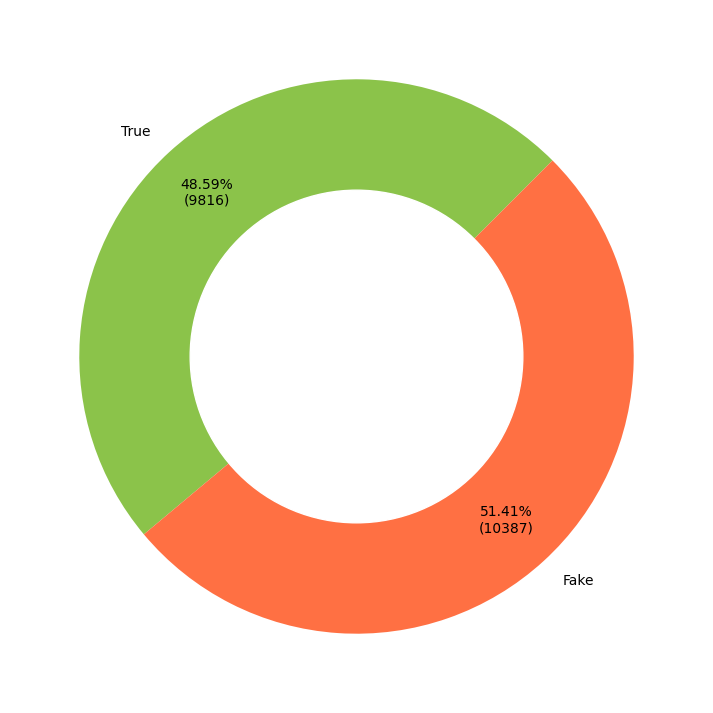

In [13]:
plt.figure(figsize=(9,9))
area = [9816 , 10387]
total = np.sum(area)

def val_per(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

labels = ['True' , 'Fake']
colors = ['#8BC34A','#FF7043']
plt.pie (area , labels= labels , colors= colors , startangle=45 , autopct=val_per, pctdistance=0.8)
my_circle=plt.Circle( (0,0), 0.6, color='white') # Adding circle at the centre
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['label'])
#X_train, X_test, y_train, y_test = train_test_split(df['content'], df['label'], test_size=0.2)

In [15]:
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

'''X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)'''

X_train.head()

,content
0,"Samsung, After Combustible Galaxy Note 7, Unve..."
1,Ryan Lochte Dropped by Speedo USA and Other Re...
2,Colin Kaepernick Starts Black Panther-Inspired...
3,Why the Truth Might Get You Fired Why the Trut...
4,Open Thread (NOT U.S. Election) 2016-39 Open T...


In [16]:
len(X_train)

74

In [17]:
len(X_test)

25

In [18]:
len(y_train)

74

In [20]:
len(y_test)

25

In [24]:
x = pd.read_csv('/content/drive/MyDrive/Fake News/train.csv')
x

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [25]:
x.drop(['id','author'], inplace= True)

KeyError: "['id', 'author'] not found in axis"